# This notebook explores the SKA1 SDP Design Equations

## Source: PDR05 v1.85

In [1]:
""" These first few lines below import the IPython definitions and methods that we will use, including the ability to
display them nicely"""
from sympy import init_session
init_session(
    use_latex=True,
    use_unicode=True,
    pretty_print=True,
    quiet=True,
)
from parameter_definitions import ParameterContainer
# Currently this file below (design_equations.py) only contains variable definitions that are used for display purposes.
# All computations are performed in the notebook itself for now. This was the same way we initially did the approached 
# the imaging equations. When they become complex it is usually necessary and desirable to move the code from the notebook
# to the dedicated Python code files.
from design_equations import DesignEquations as de 
o = ParameterContainer()
de.define_symbolic_variables(o)  # o is updated in-place

from api_ipython import SkaIPythonAPI as iapi
from parameter_definitions import *
from parameter_definitions import Constants as c
from implementation import PipelineConfig
verbose=False

import subprocess
print "Working from Git repository %s" % subprocess.check_output(["git",  "describe", "--long"])

# Pipeline configurations used in this document
scale_predict_by_facet=True
bldta = True
otf = False

cfg_all_low = PipelineConfig(Telescopes.SKA1_Low, Pipelines.imaging, Bands.Low,
                             bldta=bldta, on_the_fly=otf, scale_predict_by_facet=scale_predict_by_facet)
cfg_all_mid1 = PipelineConfig(Telescopes.SKA1_Mid, Pipelines.imaging, Bands.Mid1,
                              bldta=bldta, on_the_fly=otf, scale_predict_by_facet=scale_predict_by_facet)
cfg_all_mid2 = PipelineConfig(Telescopes.SKA1_Mid, Pipelines.imaging, Bands.Mid2,
                              bldta=bldta, on_the_fly=otf, scale_predict_by_facet=scale_predict_by_facet)

cfg_co_sp_low = PipelineConfig(Telescopes.SKA1_Low, [Pipelines.DPrepA,Pipelines.DPrepC], Bands.Low,
                          bldta=bldta, on_the_fly=otf, scale_predict_by_facet=scale_predict_by_facet)
cfg_co_sp_mid1 = PipelineConfig(Telescopes.SKA1_Mid, [Pipelines.DPrepA,Pipelines.DPrepC], Bands.Mid1,
                           bldta=bldta, on_the_fly=otf, scale_predict_by_facet=scale_predict_by_facet)
cfg_co_sp_mid2 = PipelineConfig(Telescopes.SKA1_Mid, [Pipelines.DPrepA,Pipelines.DPrepC], Bands.Mid2,
                           bldta=bldta, on_the_fly=otf, scale_predict_by_facet=scale_predict_by_facet)

cfg_cont_low = PipelineConfig(Telescopes.SKA1_Low, Pipelines.DPrepA, Bands.Low,
                               bldta=bldta, on_the_fly=otf, scale_predict_by_facet=scale_predict_by_facet)
cfg_spec_low = PipelineConfig(Telescopes.SKA1_Low, Pipelines.DPrepC, Bands.Low,
                               bldta=bldta, on_the_fly=otf, scale_predict_by_facet=scale_predict_by_facet)
cfg_cont_mid1 = PipelineConfig(Telescopes.SKA1_Mid, Pipelines.DPrepA, Bands.Mid1,
                                bldta=bldta, on_the_fly=otf, scale_predict_by_facet=scale_predict_by_facet)
cfg_spec_mid1 = PipelineConfig(Telescopes.SKA1_Mid, Pipelines.DPrepC, Bands.Mid1,
                                bldta=bldta, on_the_fly=otf, scale_predict_by_facet=scale_predict_by_facet)
cfg_cont_mid2 = PipelineConfig(Telescopes.SKA1_Mid, Pipelines.DPrepA, Bands.Mid2,
                                bldta=bldta, on_the_fly=otf, scale_predict_by_facet=scale_predict_by_facet)
cfg_spec_mid2 = PipelineConfig(Telescopes.SKA1_Mid, Pipelines.DPrepC, Bands.Mid2,
                                bldta=bldta, on_the_fly=otf, scale_predict_by_facet=scale_predict_by_facet)


IPython console for SymPy 0.7.6.1 (Python 2.7.11-64-bit) (ground types: python)
Working from Git repository deltaPDR-3-g874c056

Working from Git repository deltaPDR-3-g874c056



//anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


### 1.	The peak FLOP capability of the units taken together has to exceed the total FLOPS required for spectral line and continuum processing combined 

In [2]:
o.Ncu * o.RcuFLOP > o.RspecFLOP + o.RcontFLOP + o.RfastFLOP

In [3]:
#Or numerically
result1_low = iapi.eval_expression_default(cfg_all_low, expression='Rflop', verbose=verbose)
result1_mid1 = iapi.eval_expression_default(cfg_all_mid1, expression='Rflop', verbose=verbose)
result1_mid2 = iapi.eval_expression_default(cfg_all_mid2, expression='Rflop', verbose=verbose)
print '\nDesign Equation 1 evaluates to:\n'
print '%s > %.2f PetaFLOPS \tfor SKA1 LOW' % (str(o.Ncu * o.RcuFLOP), result1_low / c.peta)
print '%s > %.2f PetaFLOPS \tfor SKA1 MID (Band 1)' % (str(o.Ncu * o.RcuFLOP), result1_mid1 / c.peta)
print '%s > %.2f PetaFLOPS \tfor SKA1 MID (Band 2)' % (str(o.Ncu * o.RcuFLOP), result1_mid2 / c.peta)


Design Equation 1 evaluates to:

N_cu*R_cu,FLOP > 34.66 PetaFLOPS 	for SKA1 LOW
N_cu*R_cu,FLOP > 74.17 PetaFLOPS 	for SKA1 MID (Band 1)
N_cu*R_cu,FLOP > 57.37 PetaFLOPS 	for SKA1 MID (Band 2)


### 2.	The total memory bandwidth required has to exceed the required memory bandwidth

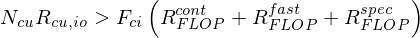

In [4]:
o.Ncu * o.RcuIo > o.Fci*(o.RspecFLOP + o.RcontFLOP + o.RfastFLOP)

In [5]:
#Or numerically
print '\nDesign Equation 2 evaluates to:\n'
Fci = 2
result2_low = result1_low*Fci
result2_mid1 = result1_mid1*Fci
result2_mid2 = result1_mid2*Fci

print '%s > %.2f PetaBytes/s \tfor SKA1 LOW' % (str(o.Ncu * o.RcuIo), result2_low / c.peta)
print '%s > %.2f PetaBytes/s \tfor SKA1 MID (Band 1)' % (str(o.Ncu * o.RcuIo), result2_mid1 / c.peta)
print '%s > %.2f PetaBytes/s \tfor SKA1 MID (Band 2)' % (str(o.Ncu * o.RcuIo), result2_mid2 / c.peta)


Design Equation 2 evaluates to:

N_cu*R_cu,io > 69.32 PetaBytes/s 	for SKA1 LOW
N_cu*R_cu,io > 148.33 PetaBytes/s 	for SKA1 MID (Band 1)
N_cu*R_cu,io > 114.73 PetaBytes/s 	for SKA1 MID (Band 2)


### 3.	The visibility buffer of all compute units together must be sufficiently large to hold both the full resolution visibilities and frequency binned visibilities for continuum processing 

In [6]:
o.Ncu * o.McuBuf > o.MspecBufVis + o.McontBufVis

In [7]:
result3_low = iapi.eval_expression_default(cfg_co_sp_low, expression='Mbuf_vis', verbose=verbose)
result3_mid1 = iapi.eval_expression_default(cfg_co_sp_mid1, expression='Mbuf_vis', verbose=verbose)
result3_mid2 = iapi.eval_expression_default(cfg_co_sp_mid2, expression='Mbuf_vis', verbose=verbose)

#Or numerically
print '\nDesign Equation 3 evaluates to:\n'
Fci = 2
print '%s > %.2f PetaBytes \tfor SKA1 LOW' % (str(o.Ncu * o.McuBuf), result3_low / c.peta)
print '%s > %.2f PetaBytes \tfor SKA1 MID (Band 1)' % (str(o.Ncu * o.McuBuf), result3_mid1 / c.peta)
print '%s > %.2f PetaBytes \tfor SKA1 MID (Band 2)' % (str(o.Ncu * o.McuBuf), result3_mid2 / c.peta)


Design Equation 3 evaluates to:

M_cu,buf*N_cu > 22.67 PetaBytes 	for SKA1 LOW
M_cu,buf*N_cu > 23.42 PetaBytes 	for SKA1 MID (Band 1)
M_cu,buf*N_cu > 23.42 PetaBytes 	for SKA1 MID (Band 2)


### 4.	The total bandwidth to the visibility buffer must exceed the greater of the bandwidth required for the continuum or spectral line case. If we assume that processing is limited by available FLOPs then the we can compute the rates as

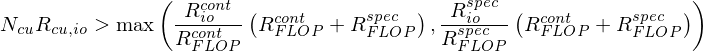

In [8]:
o.Ncu * o.RcuIo > Max(o.RspecIo*(o.RspecFLOP + o.RcontFLOP)/o.RspecFLOP, o.RcontIo*(o.RspecFLOP + o.RcontFLOP)/o.RcontFLOP)

In [9]:

Rflop_cont_low = iapi.eval_expression_default(cfg_cont_low, expression='Rflop', verbose=verbose)
Rflop_spec_low = iapi.eval_expression_default(cfg_spec_low, expression='Rflop', verbose=verbose)
Rio_cont_low = iapi.eval_expression_default(cfg_cont_low, expression='Rio', verbose=verbose)
Rio_spec_low = iapi.eval_expression_default(cfg_spec_low, expression='Rio', verbose=verbose)

Rflop_cont_mid1 = iapi.eval_expression_default(cfg_cont_mid1, expression='Rflop', verbose=verbose)
Rflop_spec_mid1 = iapi.eval_expression_default(cfg_spec_mid1, expression='Rflop', verbose=verbose)
Rio_cont_mid1 = iapi.eval_expression_default(cfg_cont_mid1, expression='Rio', verbose=verbose)
Rio_spec_mid1 = iapi.eval_expression_default(cfg_spec_mid1, expression='Rio', verbose=verbose)

Rflop_cont_mid2 = iapi.eval_expression_default(cfg_cont_mid2, expression='Rflop', verbose=verbose)
Rflop_spec_mid2 = iapi.eval_expression_default(cfg_spec_mid2, expression='Rflop', verbose=verbose)
Rio_cont_mid2 = iapi.eval_expression_default(cfg_cont_mid2, expression='Rio', verbose=verbose)
Rio_spec_mid2 = iapi.eval_expression_default(cfg_spec_mid2, expression='Rio', verbose=verbose)


result4_low = Max((Rio_cont_low/Rflop_cont_low)*(Rflop_cont_low + Rflop_spec_low), (Rio_spec_low/Rflop_spec_low)*(Rflop_cont_low + Rflop_spec_low))
result4_mid1 = Max((Rio_cont_mid1/Rflop_cont_mid1)*(Rflop_cont_mid1 + Rflop_spec_mid1), (Rio_spec_mid1/Rflop_spec_mid1)*(Rflop_cont_mid1 + Rflop_spec_mid1))
result4_mid2 = Max((Rio_cont_mid2/Rflop_cont_mid2)*(Rflop_cont_mid2 + Rflop_spec_mid2), (Rio_spec_mid2/Rflop_spec_mid2)*(Rflop_cont_mid2 + Rflop_spec_mid2))


#Or numerically
print '\nDesign Equation 4 evaluates to:\n'
print '%s > %.2f TB/s \tfor SKA1 LOW' % (str(o.Ncu * o.RcuIo), result4_low / c.tera)
print '%s > %.2f TB/s \tfor SKA1 MID (Band 1)' % (str(o.Ncu * o.RcuIo), result4_mid1 / c.tera)
print '%s > %.2f TB/s \tfor SKA1 MID (Band 2)' % (str(o.Ncu * o.RcuIo), result4_mid2 / c.tera)


Design Equation 4 evaluates to:

N_cu*R_cu,io > 184.88 TB/s 	for SKA1 LOW
N_cu*R_cu,io > 1526.12 TB/s 	for SKA1 MID (Band 1)
N_cu*R_cu,io > 986.88 TB/s 	for SKA1 MID (Band 2)


### 5.	If frequency-polarisation-beam parallelism only is to be used with no faceting or other image plane or uv plane division then

In [10]:
# Working memory per compute unit must be greater than the target grid memory
o.McuWork > o.MuvGrid

In [11]:
bldta = True
otf = False
Npix_low = iapi.eval_expression_default(cfg_all_low, expression='Npix_linear', verbose=verbose)
Npix_mid1 = iapi.eval_expression_default(cfg_all_mid1, expression='Npix_linear', verbose=verbose)
Npix_mid2 = iapi.eval_expression_default(cfg_all_mid2, expression='Npix_linear', verbose=verbose)
result4_low = 16 * Npix_low**2 # Eq 9, in bytes
result4_mid1 = 16 * Npix_mid1**2 # Eq 9, in bytes
result4_mid2 = 16 * Npix_mid2**2 # Eq 9, in bytes


print '\nDesign Equation 5a evaluates to:\n'
Fci = 2
print '%s > %.2f TB \tfor SKA1 LOW' % (str(o.McuWork), result4_low / c.tera)
print '%s > %.2f TB \tfor SKA1 MID (Band 1)' % (str(o.McuWork), result4_mid1 / c.tera)
print '%s > %.2f TB \tfor SKA1 MID (Band 2)' % (str(o.McuWork), result4_mid2 / c.tera)


Design Equation 5a evaluates to:

M_cu,work > 0.28 TB 	for SKA1 LOW
M_cu,work > 1.23 TB 	for SKA1 MID (Band 1)
M_cu,work > 1.73 TB 	for SKA1 MID (Band 2)


In [12]:
# Each compute unit must have reasonably fast memory to keep the grids not being immediately worked on (M_(cu,pool )). 
# The experience of ASKAPSoft is that about 10 copies are necessary
o.McuPool > 10 * o.MuvGrid 

In [13]:
#Or numerically
print '\nDesign Equation 5b evaluates to:\n'
Fci = 2
print '%s > %.2f TB \tfor SKA1 LOW' % (str(o.McuPool), 10*result4_low / c.tera)
print '%s > %.2f TB \tfor SKA1 MID (Band 1)' % (str(o.McuPool), 10*result4_mid1 / c.tera)
print '%s > %.2f TB \tfor SKA1 MID (Band 2)' % (str(o.McuPool), 10*result4_mid2 / c.tera)


Design Equation 5b evaluates to:

M_cu,pool > 2.84 TB 	for SKA1 LOW
M_cu,pool > 12.33 TB 	for SKA1 MID (Band 1)
M_cu,pool > 17.33 TB 	for SKA1 MID (Band 2)


In [14]:
# The FFT and Gridding computing steps are limited by available 
o.NfOut * o.RcuFLOP > 2 * o.Nmajor * (o.Rfft + o.Rrp)  

In [15]:
bldta = True
otf = False

Nmajor_low = iapi.eval_expression_default(cfg_all_low, expression='Nmajor', verbose=verbose)
Rfft_low = iapi.eval_expression_default(cfg_all_low, expression='Rflop_fft_bw', verbose=verbose)
Rrp_low = iapi.eval_expression_default(cfg_all_low, expression='Rrp', verbose=verbose)

Nmajor_mid1 = iapi.eval_expression_default(cfg_all_mid1, expression='Nmajor', verbose=verbose)
Rfft_mid1 = iapi.eval_expression_default(cfg_all_mid1, expression='Rflop_fft_bw', verbose=verbose)
Rrp_mid1 = iapi.eval_expression_default(cfg_all_mid1, expression='Rrp', verbose=verbose)

Nmajor_mid2 = iapi.eval_expression_default(cfg_all_mid2, expression='Nmajor', verbose=verbose)
Rfft_mid2 = iapi.eval_expression_default(cfg_all_mid2, expression='Rflop_fft_bw', verbose=verbose)
Rrp_mid2 = iapi.eval_expression_default(cfg_all_mid2, expression='Rrp', verbose=verbose)

tp = ParameterContainer()
ParameterDefinitions.apply_global_parameters(tp)
ParameterDefinitions.apply_telescope_parameters(tp, Telescopes.SKA1_Low)
ParameterDefinitions.apply_pipeline_parameters(tp, Pipelines.DPrepA)
Nf_out_low = tp.Nf_out
ParameterDefinitions.apply_pipeline_parameters(tp, Pipelines.DPrepC)
Nf_out_low += tp.Nf_out
ParameterDefinitions.apply_pipeline_parameters(tp, Pipelines.Fast_Img)
Nf_out_low += tp.Nf_out

tp = ParameterContainer()
ParameterDefinitions.apply_global_parameters(tp)
ParameterDefinitions.apply_telescope_parameters(tp, Telescopes.SKA1_Mid)
ParameterDefinitions.apply_pipeline_parameters(tp, Pipelines.DPrepA)
Nf_out_mid1 = tp.Nf_out
ParameterDefinitions.apply_pipeline_parameters(tp, Pipelines.DPrepC)
Nf_out_mid1 += tp.Nf_out
ParameterDefinitions.apply_pipeline_parameters(tp, Pipelines.Fast_Img)
Nf_out_mid1 += tp.Nf_out


tp = ParameterContainer()
ParameterDefinitions.apply_global_parameters(tp)
ParameterDefinitions.apply_telescope_parameters(tp, Telescopes.SKA1_Mid)
ParameterDefinitions.apply_pipeline_parameters(tp, Pipelines.DPrepA)
Nf_out_mid2 = tp.Nf_out
ParameterDefinitions.apply_pipeline_parameters(tp, Pipelines.DPrepC)
Nf_out_mid2 += tp.Nf_out
ParameterDefinitions.apply_pipeline_parameters(tp, Pipelines.Fast_Img)
Nf_out_mid2 += tp.Nf_out


result5c_low = 2*Nmajor_low*(Rfft_low + Rrp_low)/Nf_out_low
result5c_mid1 = 2*Nmajor_mid1*(Rfft_mid1 + Rrp_mid1)/Nf_out_mid1
result5c_mid2 = 2*Nmajor_mid2*(Rfft_mid2 + Rrp_mid2)/Nf_out_mid2


#Or numerically
print '\nDesign Equation 5c evaluates to:\n'
print '%s > %.2f TFLOP/s \tfor SKA1 LOW' % (str(o.RcuFLOP), result5c_low / c.tera)
print '%s > %.2f TFLOP/s \tfor SKA1 MID (Band1)' % (str(o.RcuFLOP), result5c_mid1 / c.tera)
print '%s > %.2f TFLOP/s \tfor SKA1 MID (Band2)' % (str(o.RcuFLOP), result5c_mid2 / c.tera)


Design Equation 5c evaluates to:

R_cu,FLOP > 2.83 TFLOP/s 	for SKA1 LOW
R_cu,FLOP > 8.10 TFLOP/s 	for SKA1 MID (Band1)
R_cu,FLOP > 5.43 TFLOP/s 	for SKA1 MID (Band2)


In [16]:
# Or, display them as a table
labels = ('Design eqn', '1', '2', '3')
values_1 = ('SKA1-Low', round(result1_low / c.peta, 2), round(result2_low / c.peta, 2), round(result3_low / c.peta, 2))
values_2 = ('SKA1-Mid (Band1)', round(result1_mid1 / c.peta, 2), round(result2_mid1 / c.peta, 2), round(result3_mid1 / c.peta, 2))
values_3 = ('SKA1-Mid (Band2)', round(result1_mid2 / c.peta, 2), round(result2_mid2 / c.peta, 2), round(result3_mid2 / c.peta, 2))

units = ('', 'PFLOP', 'PB/s', 'PB')

iapi.show_table_compare3('"Table 10" in PDR05 v1.85', labels, values_1, values_2, values_3, units)
print 'etc...'

Design eqn,SKA1-Low,SKA1-Mid (Band1),SKA1-Mid (Band2),
1,34.7,74.2,57.4,PFLOP
2,69.3,148,115,PB/s
3,22.7,23.4,23.4,PB


etc...


### 6. The total interconnect bandwidth must exceed that needed for faceting

In [17]:
o.Ncu * o.RcuInter > o.Rinterfacet

In [18]:
bldta = True
otf = False
Rinterfacet_low = iapi.eval_expression_default(cfg_all_low, expression='Rinterfacet', verbose=verbose)
RInterfacet_mid1 = iapi.eval_expression_default(cfg_all_mid1, expression='Rinterfacet', verbose=verbose)
RInterfacet_mid2 = iapi.eval_expression_default(cfg_all_mid2, expression='Rinterfacet', verbose=verbose)


#Or numerically
print '\nDesign Equation for continuum faceting evaluates to:\n'
print '%s > %.2f TB/s \tfor SKA1 LOW, all modes' % (str(o.Ncu * o.RcuInter), Rinterfacet_low / c.tera)
print '%s > %.2f TB/s \tfor SKA1 MID (Band1), all modes' % (str(o.Ncu * o.RcuInter), RInterfacet_mid1 / c.tera)
print '%s > %.2f TB/s \tfor SKA1 MID (Band2), all modes' % (str(o.Ncu * o.RcuInter), RInterfacet_mid2 / c.tera)


Design Equation for continuum faceting evaluates to:

N_cu*R_cu,inter > 5.14 TB/s 	for SKA1 LOW, all modes
N_cu*R_cu,inter > 125.74 TB/s 	for SKA1 MID (Band1), all modes
N_cu*R_cu,inter > 109.75 TB/s 	for SKA1 MID (Band2), all modes
